In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt

path_root = {
    'daymet': '/lustre/or-scratch/cades-ccsi/scratch/ywo/E3SM/inputdata/atm/datm7/CLM1PT_data/1x1pt_UC_Davis', 
    'jra': '/nfs/data/ccsi/proj-shared/E3SM/pt-e3sm-inputdata/atm/datm7/CRUJARv2/cpl_bypass_ucdavis'
}

path_vars = {
    'daymet': {
        'TBOT': 'GSWP3_daymet4_TBOT_1980-2014_z01.nc', 
        'PRECTmms': 'GSWP3_daymet4_PRECTmms_1980-2014_z01.nc', 
        'QBOT': 'GSWP3_daymet4_QBOT_1980-2014_z01.nc',
        'WIND': 'GSWP3_daymet4_WIND_1980-2014_z01.nc',
        'PSRF': 'GSWP3_daymet4_PSRF_1980-2014_z01.nc',
        'FLDS': 'GSWP3_daymet4_FLDS_1980-2014_z01.nc',
        'FSDS': 'GSWP3_daymet4_FSDS_1980-2014_z01.nc'
    }, 
    'jra': {
        'TBOT': 'CRUJRAV2.3.c2023.0.5x0.5_TBOT_1901-2021_z03.nc', 
        'PRECTmms': 'CRUJRAV2.3.c2023.0.5x0.5_PRECTmms_1901-2021_z03.nc', 
        'QBOT': 'CRUJRAV2.3.c2023.0.5x0.5_QBOT_1901-2021_z03.nc',
        'WIND': 'CRUJRAV2.3.c2023.0.5x0.5_WIND_1901-2021_z03.nc',
        'PSRF': 'CRUJRAV2.3.c2023.0.5x0.5_PSRF_1901-2021_z03.nc',
        'FLDS': 'CRUJRAV2.3.c2023.0.5x0.5_FLDS_1901-2021_z03.nc',
        'FSDS': 'CRUJRAV2.3.c2023.0.5x0.5_FSDS_1901-2021_z03.nc'
    }
}

varlist = ['TBOT', 'PRECTmms', 'QBOT', 'WIND', 'PSRF', 'FLDS', 'FSDS']

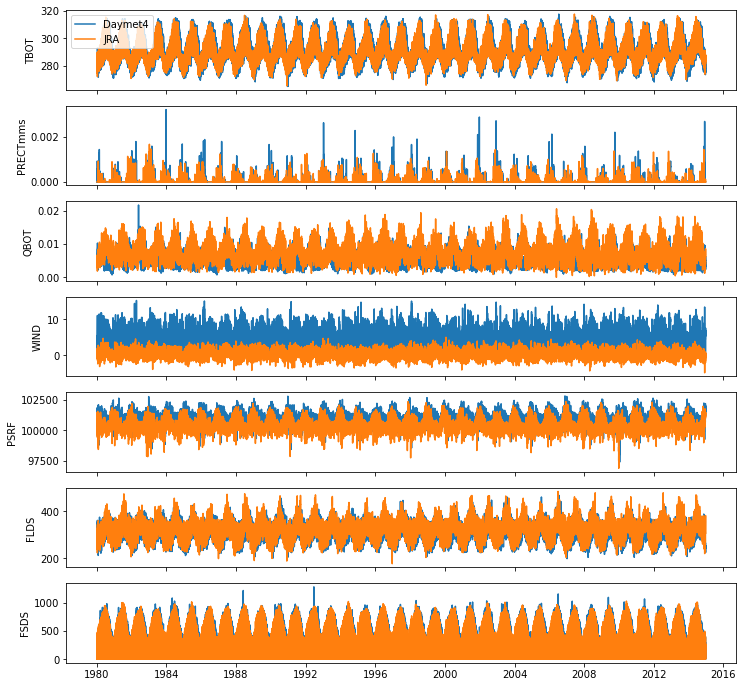

In [8]:
fig, axes = plt.subplots(7, 1, figsize = (12, 12), sharex = True)
for i, var in enumerate(varlist):
    hr_1 = xr.open_dataset(os.path.join(path_root['daymet'], path_vars['daymet'][var]))
    hr_2 = xr.open_dataset(os.path.join(path_root['jra'], path_vars['jra'][var]))

    ax = axes.flat[i]

    t_1 = hr_1['DTIME'][1::2].to_index()
    t_2 = hr_2['DTIME'][:].to_index()

    o_1 = t_1.isin(t_2)
    o_2 = t_2.isin(t_1)

    # every 6 hour instead of every 3 hour
    ax.plot(t_1[o_1], hr_1[var][0, 1::2][o_1], label = 'Daymet4')
    ax.plot(t_2[o_2], hr_2[var][0, :][o_2], label = 'JRA')

    ax.set_ylabel(var)

    if i == 0:
        ax.legend()

    hr_1.close()
    hr_2.close()